<a href="https://colab.research.google.com/github/KENE508/Netflix-Content-Strategy-Project/blob/main/Netflix_Content_Strategy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
netflix_data = pd.read_csv('/content/drive/My Drive/csv_folders/netflix_titles.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
netflix_data.set_index("show_id", inplace=True) #converted my show_id column to my index

In [ ]:
netflix_data.info()   #Checking for missing data and my data types

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [19]:
netflix_data = netflix_data.fillna({"director" : "unknown", "cast" : "unknown", "country" : "unknown", "rating" : "unknown", "duration" : "unknown"})
# handled missing data

In [20]:
netflix_data["date_added"] = pd.to_datetime(netflix_data["date_added"], format='mixed', errors="coerce") #converted to datetime format
netflix_data["release_year"] = pd.to_datetime(netflix_data["release_year"], format = '%Y')

In [21]:
netflix_data = netflix_data.astype({"type" : "category", "country" : "category", "rating" : "category", "listed_in" : "category"})
#Also converted to categorical data types

In [ ]:
netflix_data.shape[0] #We have a total of 8807 shows on this data set

8807

In [ ]:
netflix_data.describe()

,date_added,release_year
count,8797,8807.000000
mean,2019-05-17 05:59:08.436967168,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-02 00:00:00,2017.000000
75%,2020-08-19 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


<Axes: title={'center': 'Distribution of Movies and Tv shows'}, xlabel='type', ylabel='Count'>

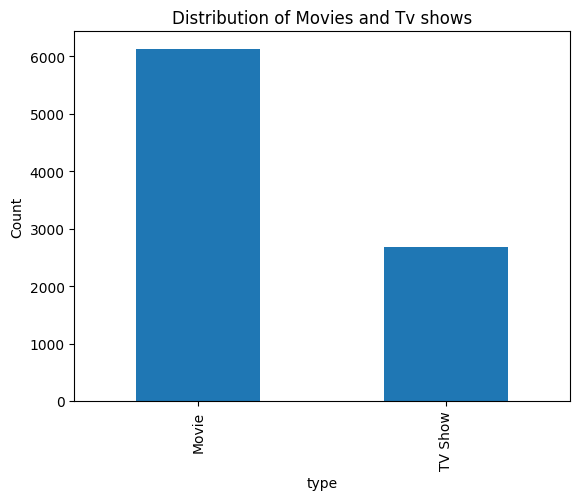

In [ ]:
netflix_data["type"].value_counts().plot.bar(title="Distribution of Movies and Tv shows", ylabel="Count") #we have more movies than tv shows

<Axes: title={'center': 'Distribution of content release over time'}, xlabel='release_year', ylabel='Count'>

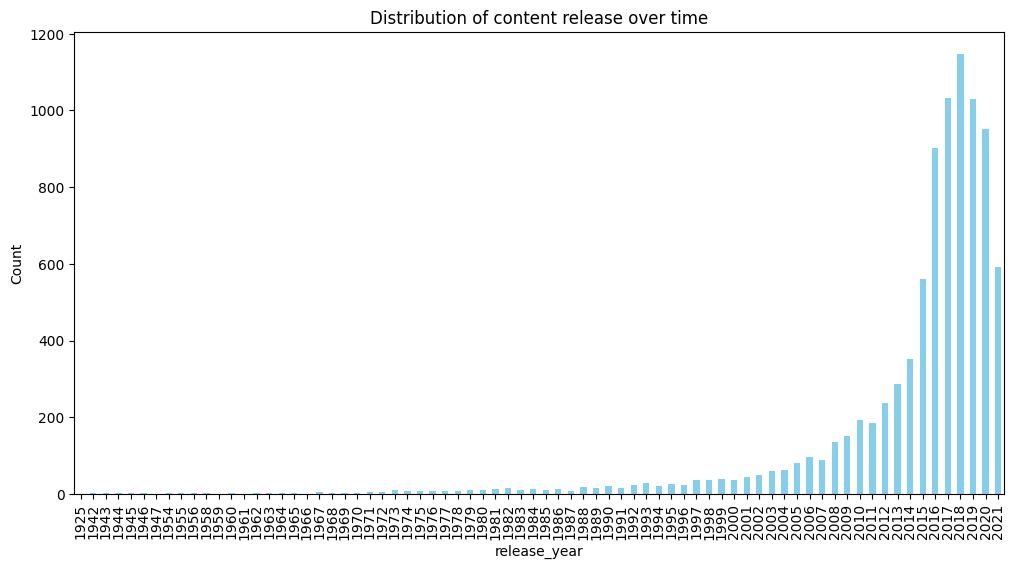

In [ ]:
release_overtime = netflix_data["release_year"].value_counts().sort_index()
release_overtime.plot.bar(title= "Distribution of content release over time", ylabel="Count", color='skyblue', figsize=(12, 6))
#Over time, 2018 saw the highest amount of movies and tv shows released .

<Axes: title={'center': 'Most common genre'}, xlabel='Genre', ylabel='Counts'>

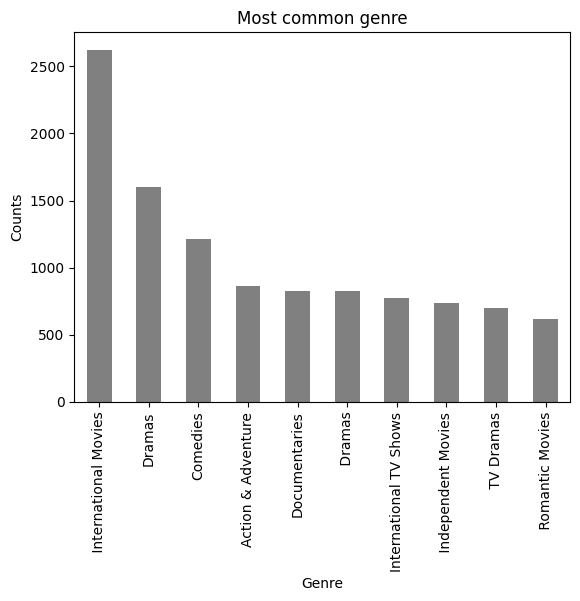

In [ ]:
common_genre = netflix_data["listed_in"].str.split(',').explode()
genre_counts = common_genre.value_counts()
genre_counts.head(10).plot.bar(title="Most common genre", xlabel= "Genre", ylabel="Counts", color='grey')
#Released more of international movies over the years, making it the most commom genre in this dataset

<Axes: title={'center': 'Top 10 Countries with the most Titles'}, xlabel='country', ylabel='Number of titles'>

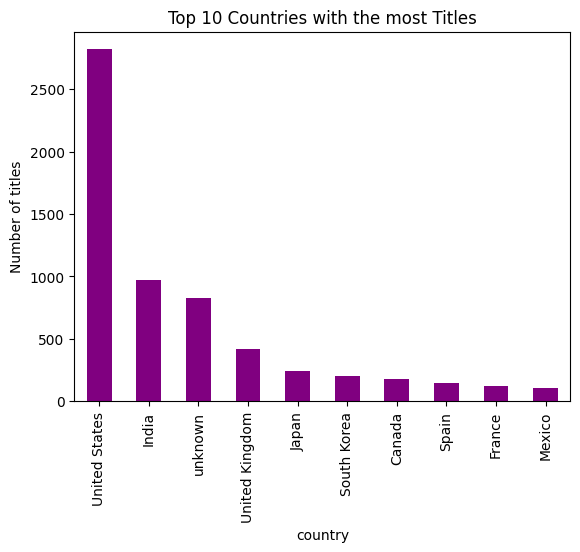

In [ ]:
Top_10 = netflix_data["country"].value_counts()
Top_10.head(10).plot.bar(title= "Top 10 Countries with the most Titles", ylabel="Number of titles", color = "purple")

<Axes: title={'center': 'Countries Producing more Movies'}, xlabel='country', ylabel='Number of Movies'>

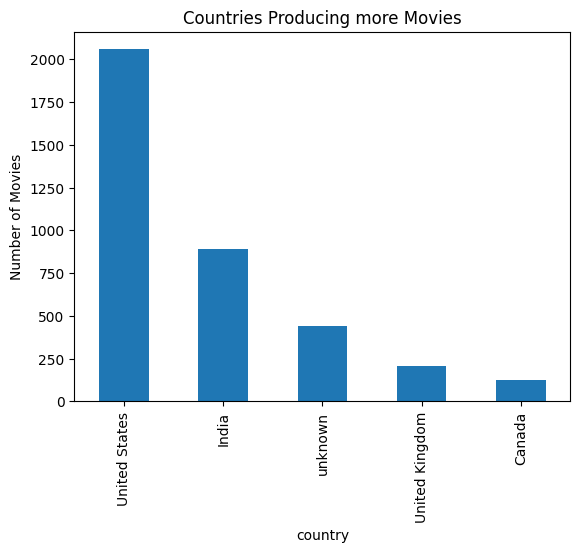

In [ ]:
netflix_data[netflix_data['type']=='Movie']['country'].value_counts().head().plot.bar(title="Countries Producing more Movies", ylabel="Number of Movies")
#Movies are viewed more in the United States

<Axes: title={'center': 'Trend of Movies vs Tv shows released overtime on Netflix'}, xlabel='release_year', ylabel='Number of Titles Released'>

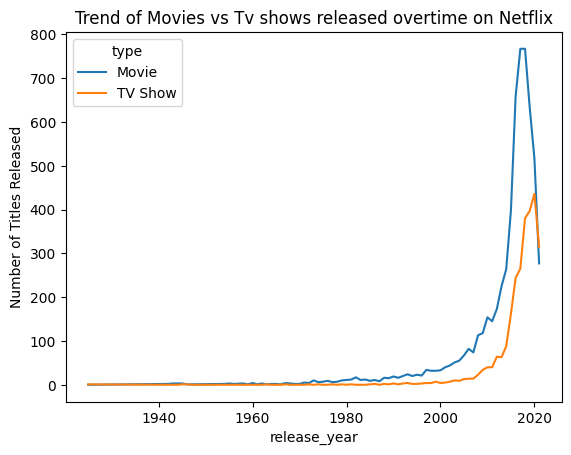

In [ ]:
shows_overtime = netflix_data.groupby(['release_year', 'type'], observed=False).size().unstack()
shows_overtime.plot(title="Trend of Movies vs Tv shows released overtime on Netflix", ylabel="Number of Titles Released")
#Notice the spike in the production of movies over tv shows

In [ ]:
pivot_table = netflix_data.pivot_table(index='rating', columns='type', aggfunc='size', fill_value=0)
pivot_table                                         #This table shows the relationship between content rantings and the type of content

type,Movie,TV Show
rating,,
66 min,1,0
74 min,1,0
84 min,1,0
G,41,0
NC-17,3,0
NR,75,5
PG,287,0
PG-13,490,0
R,797,2


<Axes: title={'center': 'Content ratings vs type of content'}, xlabel='Content ratings', ylabel='Number of titles'>

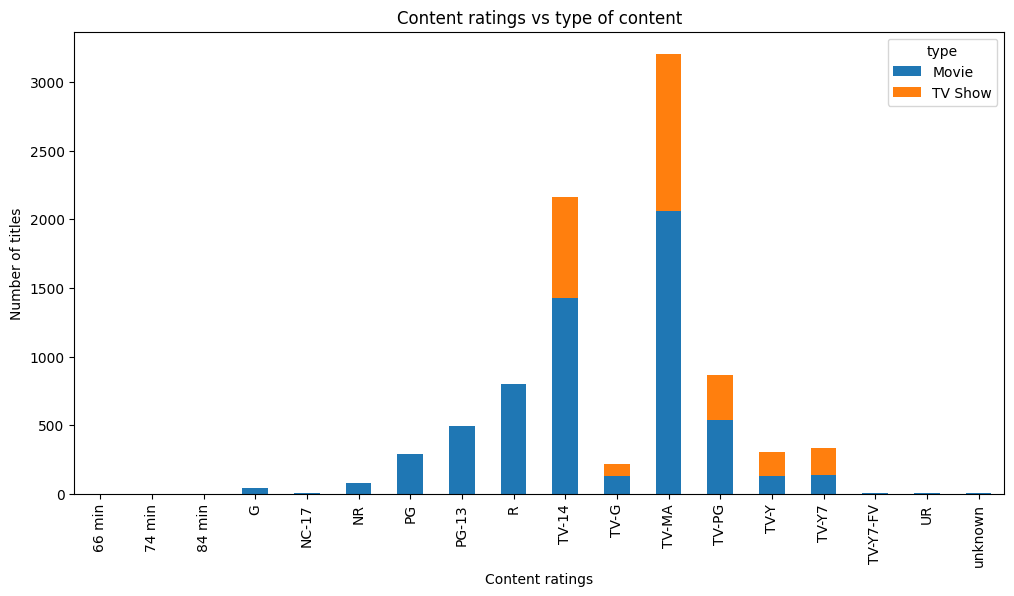

In [ ]:
pivot_table.plot.bar(title='Content ratings vs type of content',
                     xlabel= 'Content ratings', ylabel='Number of titles',stacked=True, figsize=(12, 6))
#A stacked bar chart showing the relationship between content ratings and the type of ratings

In [7]:
netflix_data["country"] = netflix_data["country"].str.split(',')    #Spliting the country column and exploding it to ensure each row has just one country for
                                                                    #easy slicing
netflix_data = netflix_data.explode("country")

In [22]:
netflix_data['genre'] = netflix_data["listed_in"].str.split(',')    #Had to split this as well and from the data you can see how it appears
netflix_data = netflix_data.explode("genre")
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows
s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Dramas
s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Mysteries
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows


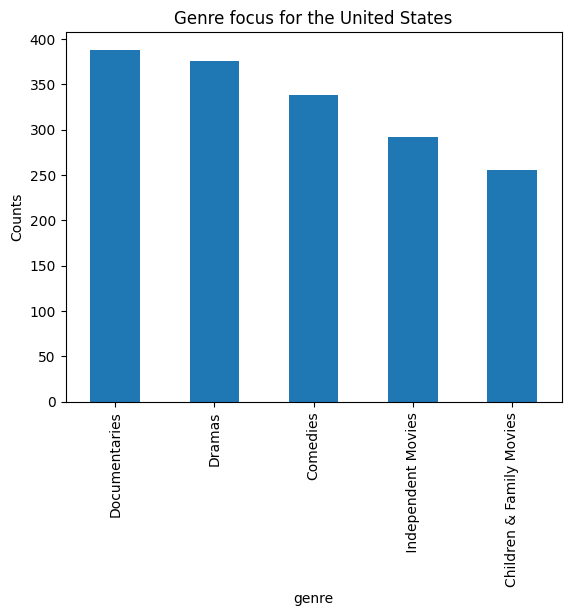

In [32]:
genre_focus = netflix_data.groupby(["country", "genre"], observed=False).size()
genre_focus.loc["United States"].sort_values(ascending=False).head().plot.bar(title="Genre focus for the United States", ylabel="Counts");
#The following bars shows the genres netflix should focus on in each country

<Axes: title={'center': 'Genre focus for Japan'}, xlabel='genre', ylabel='Counts'>

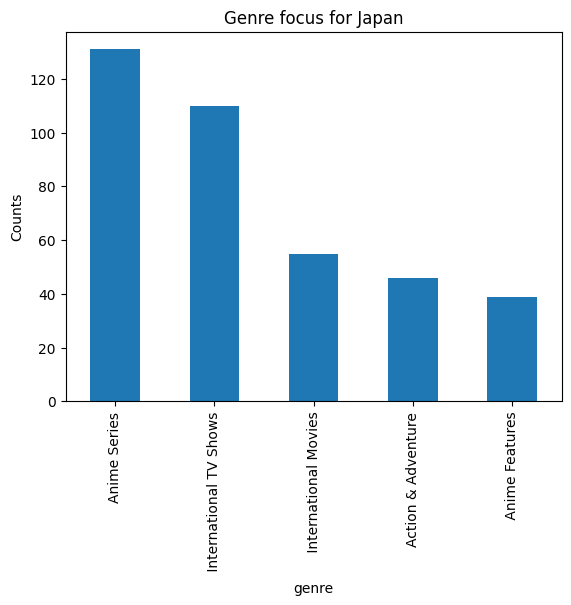

In [24]:
genre_focus.loc["Japan"].sort_values(ascending=False).head().plot.bar(title="Genre focus for Japan", ylabel="Counts")

<Axes: title={'center': 'Genre focus for India'}, xlabel='genre', ylabel='Counts'>

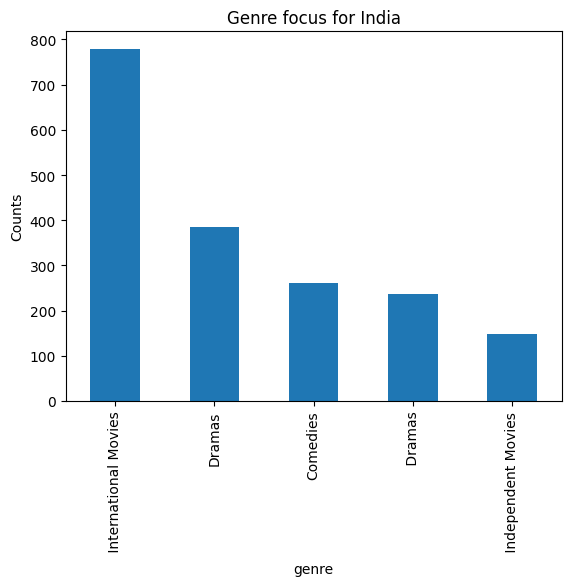

In [25]:
genre_focus.loc["India"].sort_values(ascending=False).head().plot.bar(title="Genre focus for India", ylabel="Counts")
#This place has 2 drama bars

<Axes: title={'center': 'Genre focus for the United kingdom'}, xlabel='genre', ylabel='Counts'>

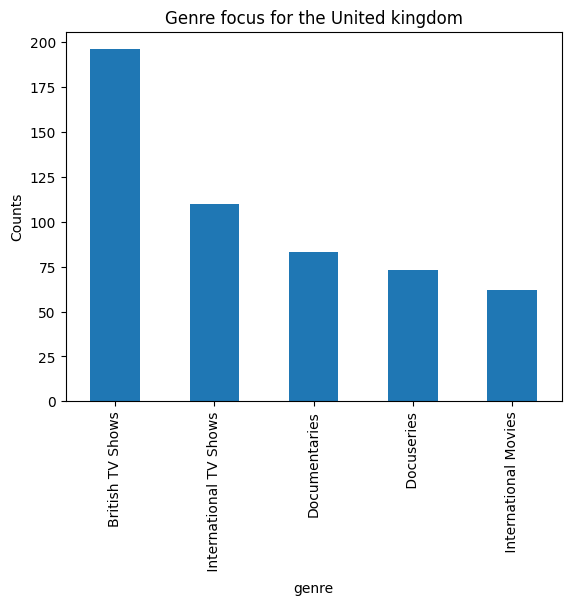

In [26]:
genre_focus.loc["United Kingdom"].sort_values(ascending=False).head().plot.bar(title="Genre focus for the United kingdom", ylabel="Counts")

<Axes: title={'center': 'Genre focus for Canada'}, xlabel='genre', ylabel='Counts'>

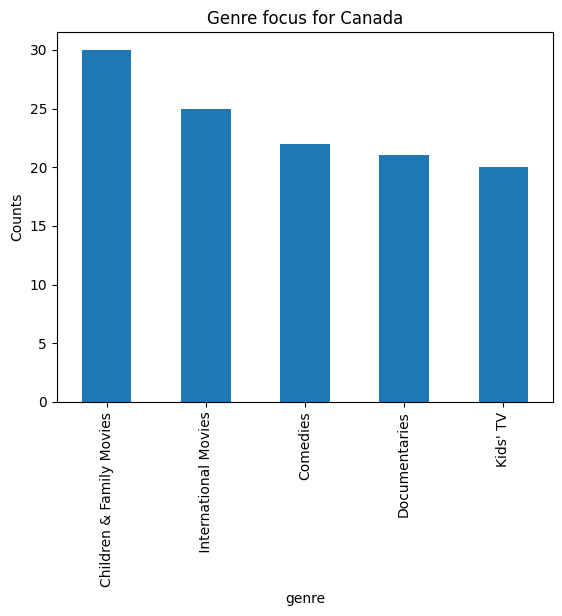

In [27]:
genre_focus.loc["Canada"].sort_values(ascending=False).head().plot.bar(title="Genre focus for Canada", ylabel="Counts")

In [ ]:
genre_rating = netflix_data.groupby(["genre", "rating"],observed=False).size().reset_index(name="counts")    #distribution of content ratings by genre
genre_rated = genre_rating.sort_values(["genre", "counts"], ascending=[True, False])

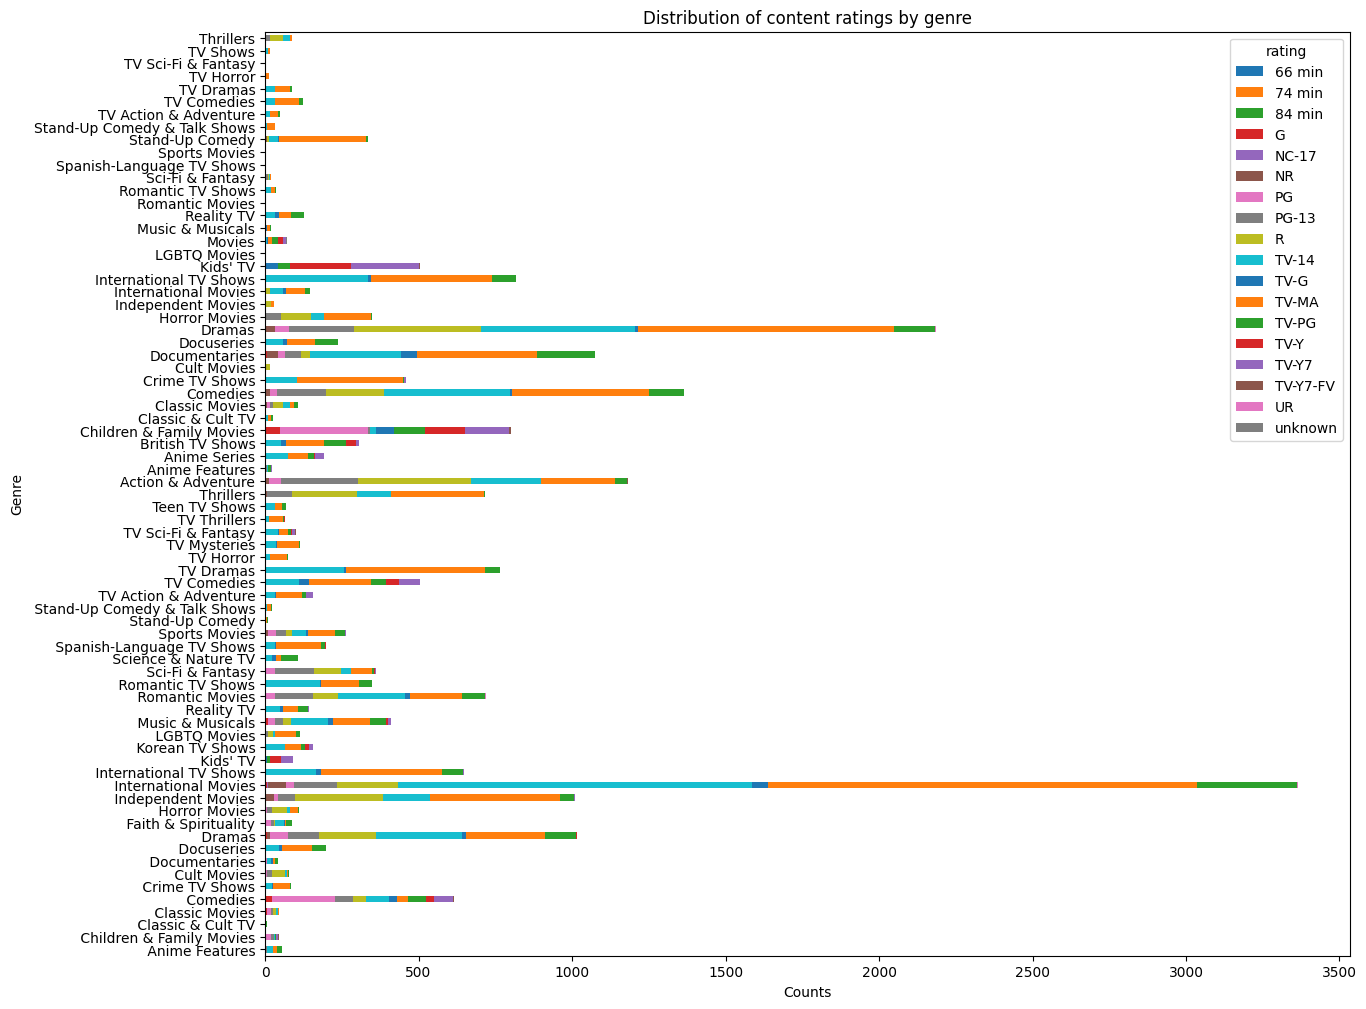

In [ ]:
genre_rated.pivot_table(index="genre", columns="rating", values="counts").fillna(0).plot.barh(title="Distribution of content ratings by genre", ylabel='Genre', xlabel='Counts', stacked=True, figsize=(14, 12));

<Axes: xlabel='release_year'>

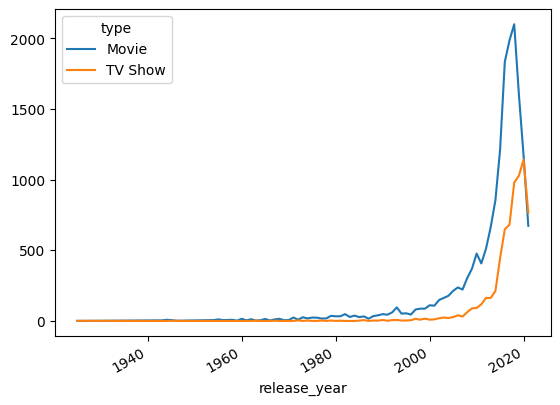

In [ ]:
yearly_release = netflix_data.groupby(["type","release_year"], observed=False).size().reset_index(name="counts")
released_yearly = yearly_release.pivot_table(index="release_year", columns="type", values="counts").fillna(0)
released_yearly.plot()      #Yearly release of movies and Tv shows over the years

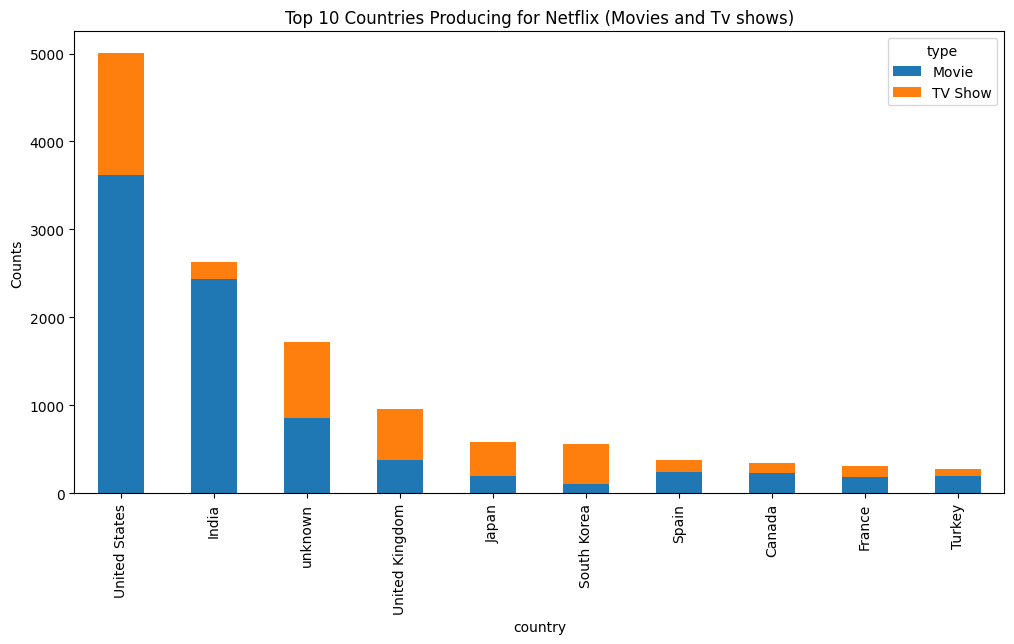

In [34]:
top_country_content = netflix_data.groupby(["country", "type"], observed=False).size().reset_index(name="counts")
tcc = top_country_content.pivot_table(index="country", columns="type", values="counts", observed=False).fillna(0)
tcc["total"] = tcc.sum(axis=1)
tcc_sorted = tcc.sort_values(["total"], ascending=False)
tcc_sorted[["Movie", "TV Show"]].head(10).plot.bar(title= "Top 10 Countries Producing for Netflix (Movies and Tv shows)", ylabel='Counts', stacked=True, figsize=(12, 6));
#Top 10 countries producing content for netflix

RECOMMENDATIONS:

Based on the analysis, I propose the following recommendations to improve content distribution across various countries and optimize the performance of each type of content:

 - Focus on Popular Genres:

Netflix should prioritize producing content in genres that are widely appreciated, such as international movies, dramas, and comedies, as these genres consistently perform well across multiple regions.
 - Leverage High-Rated Genres in Key Markets:

1.In countries like the United States, where movies dominate, Netflix should continue focusing on highly rated genres like documentaries and dramas, especially those rated TV-MA and TV-14.

2.Netflix could also experiment with creating TV shows within these genres, which could attract audiences and diversify its content portfolio, potentially driving long-term growth in TV show consumption.
 - Expand TV Show Production in Countries Favoring TV Shows:

1.In regions like South Korea and Japan, where the audience preference leans heavily toward TV shows, Netflix should continue producing more TV series to meet local demand.

2.In Japan, where anime is a popular genre, Netflix could explore creating anime movies in addition to anime TV shows. This dual approach could increase engagement in both the TV and movie categories, maximizing content impact in this market.
 - Tailor Regional Content Strategies:

By analyzing country-specific preferences, Netflix can adjust its content strategy in each market. For example, focusing on international movies in markets where global content resonates and aligning content ratings with the preferences of local audiences can help maintain viewer engagement.


In [ ]:
#Thank you for taking out time to look at my work, cheers!